# Reading and Importing Data

In [1]:
#importing csv file
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix
data = pd.read_csv("diabetes.csv")

In [2]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.shape

(768, 9)

In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


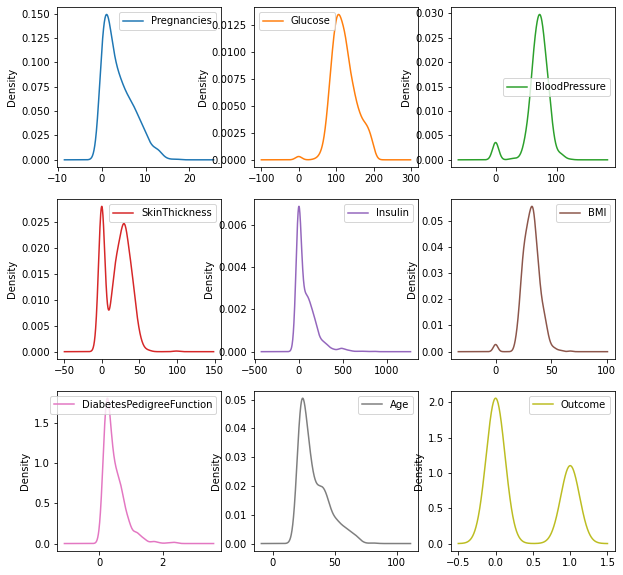

In [6]:
from matplotlib import pyplot
import matplotlib.pyplot as plt 
data.plot(kind='density', subplots=True, layout=(3,3), sharex=False , figsize =(10,10))
plt.show()

# Data pre-processing

In [7]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
features = data.columns
cols = (data[features] == 0).sum()
print(cols)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [9]:
data['Pregnancies']=data['Pregnancies'].replace(0,data['Pregnancies'].mean())

In [10]:
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())

In [11]:
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())

In [12]:
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].mean())

In [13]:
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].mean())

In [14]:
data['BMI']=data['BMI'].replace(0,data['BMI'].mean())

In [15]:
features = data.columns
cols = (data[features] == 0).sum()
print(cols)

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


# Visualisation

In [16]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

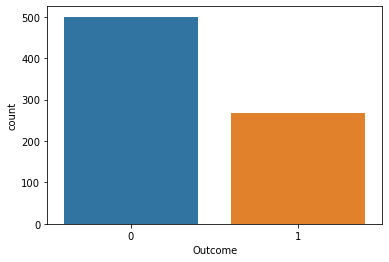

In [17]:
sns.countplot(data['Outcome'],label="Count")

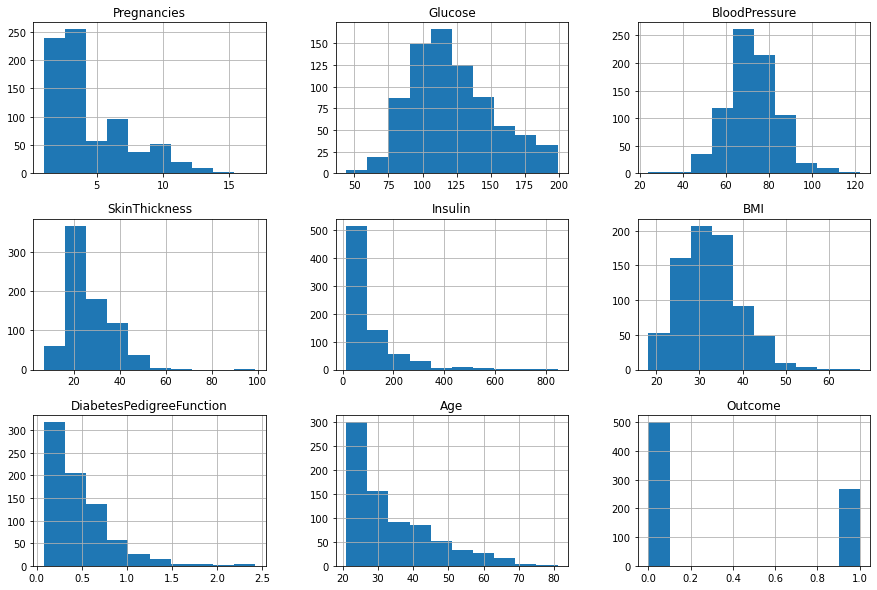

In [18]:
data.hist(figsize=(15,10))
plt.show()

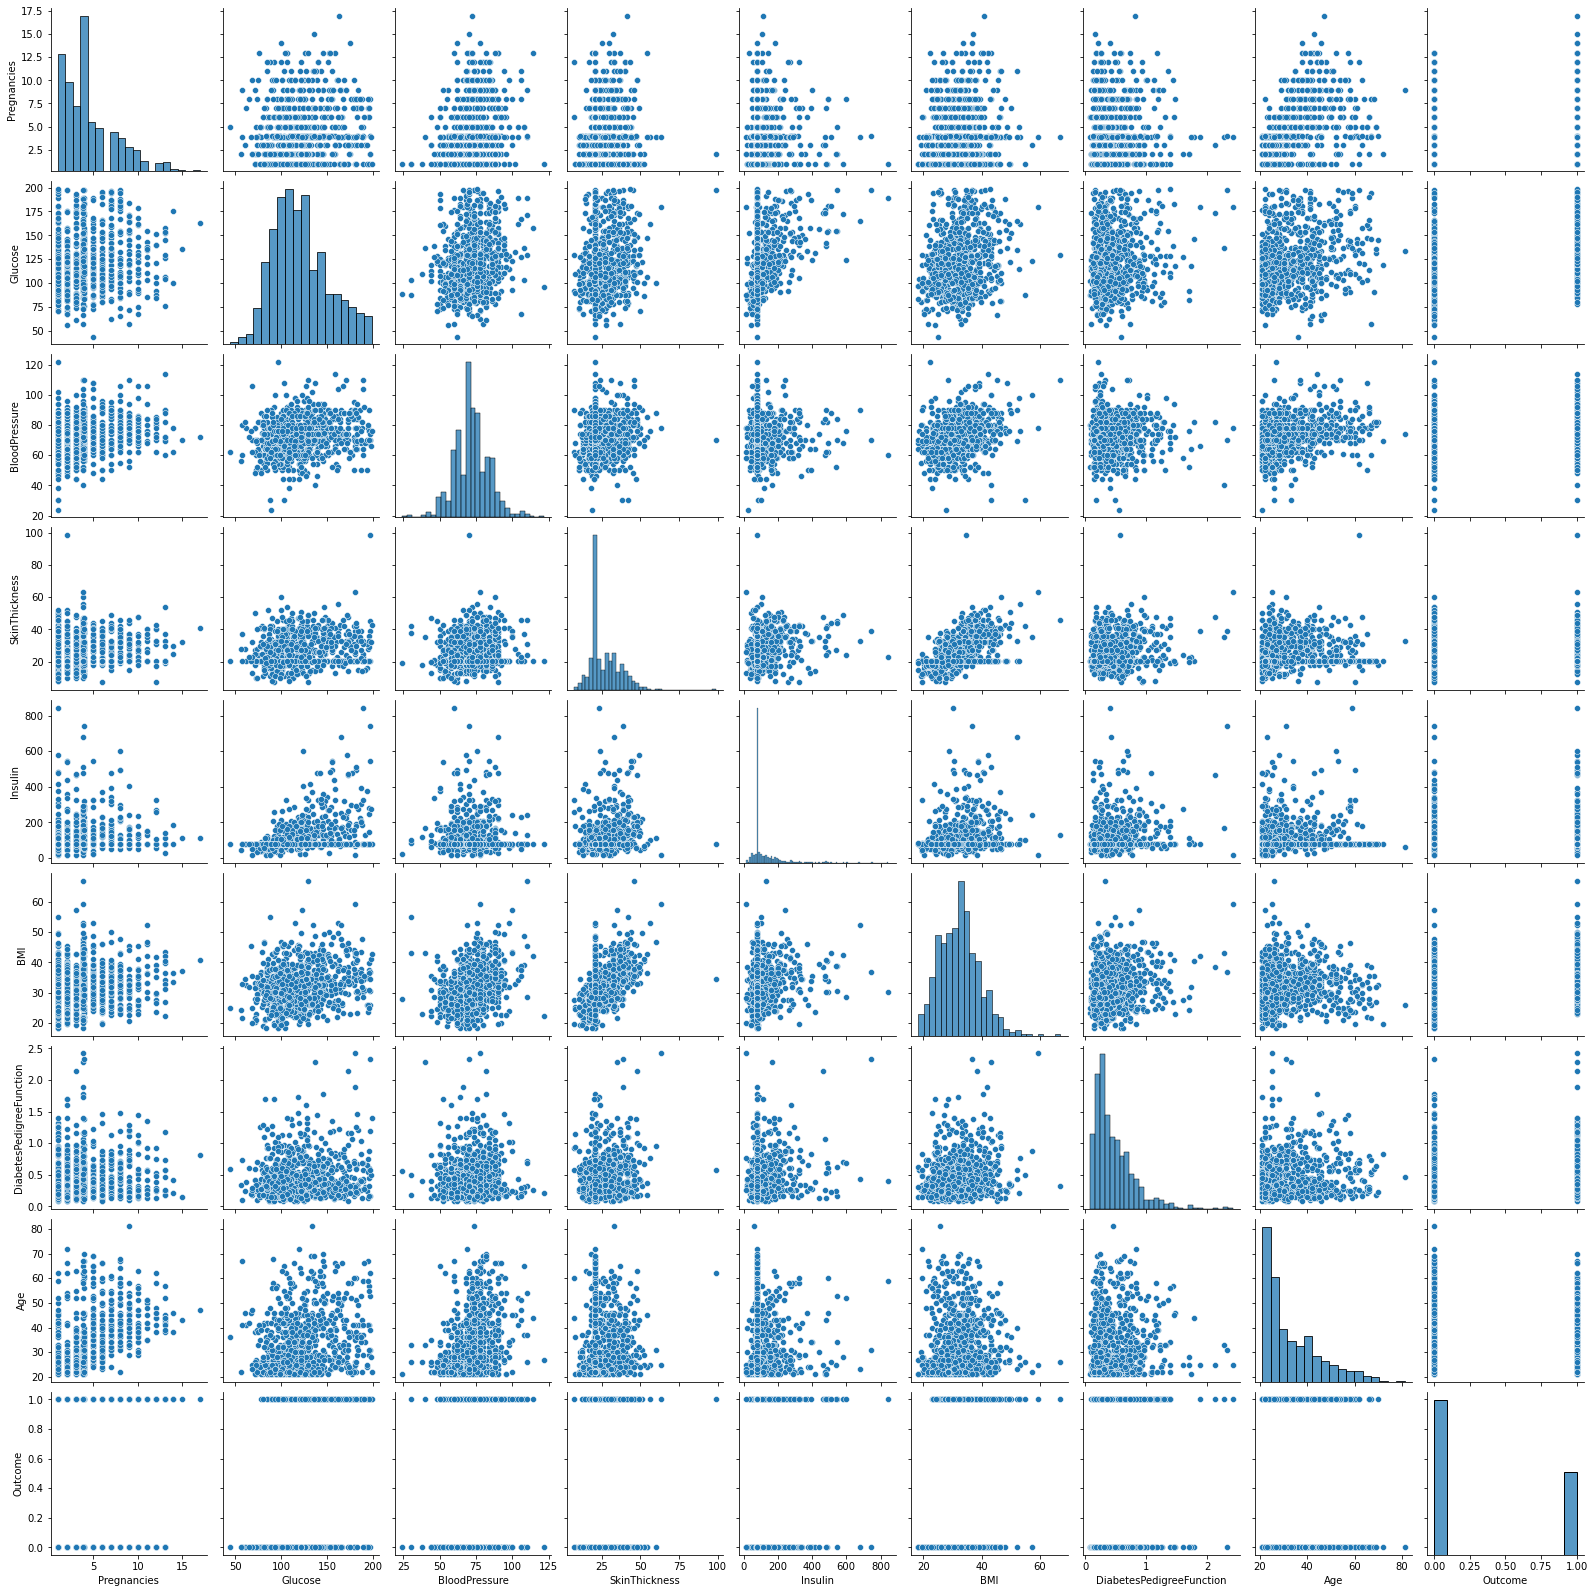

In [19]:
sns.pairplot(data)

# Co-Relation

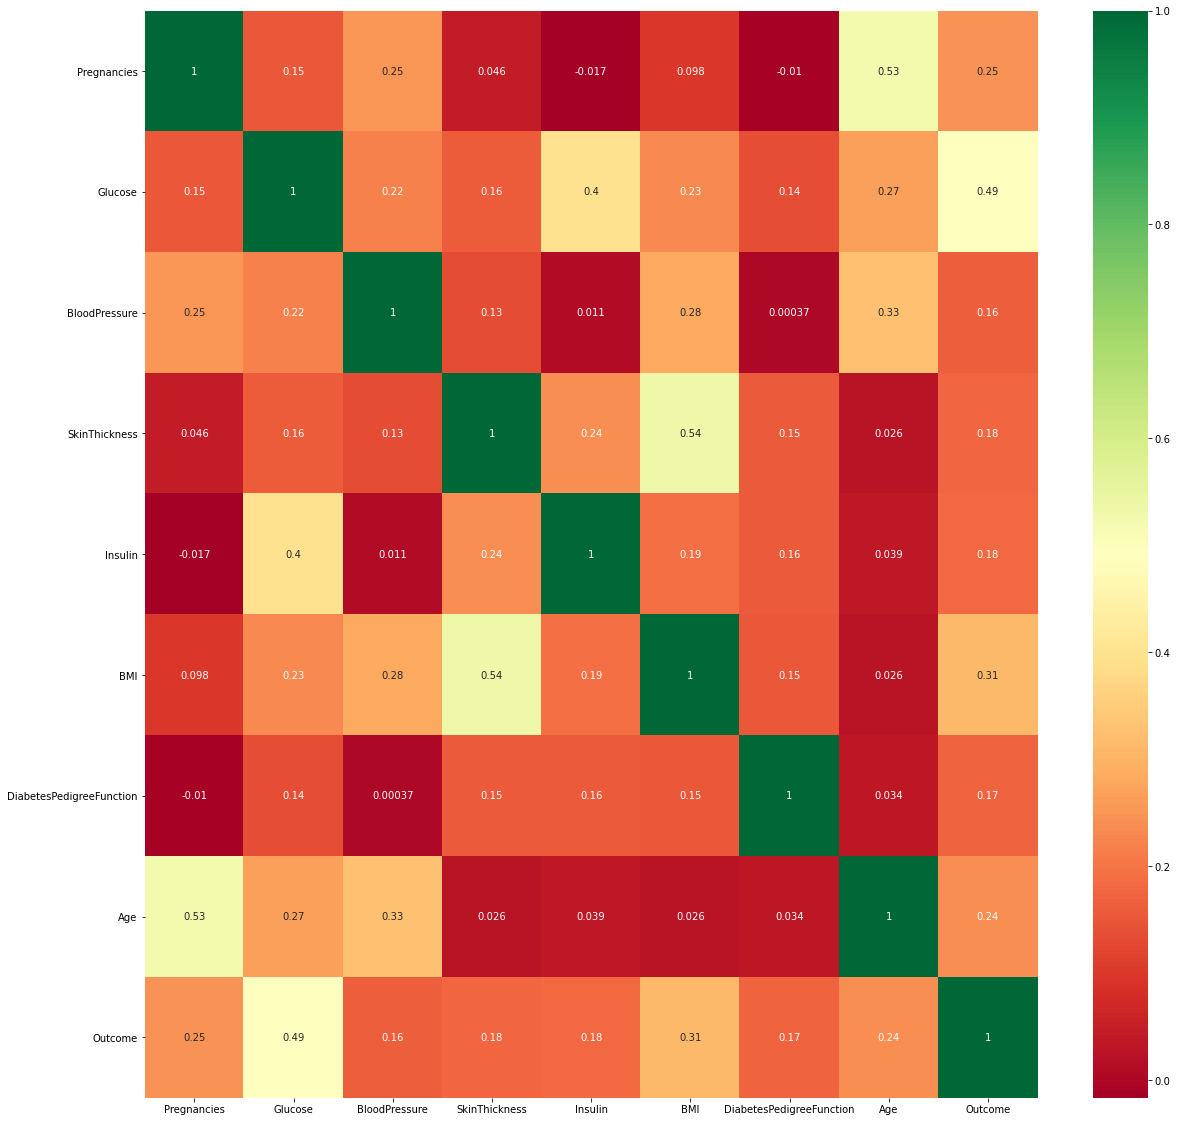

In [21]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap= "RdYlGn")

In [22]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.152568,0.253275,0.045776,-0.016738,0.097663,-0.010297,0.525261,0.247971
Glucose,0.152568,1.000000,0.219666,0.160766,0.396597,0.231478,0.137106,0.266600,0.492908
BloodPressure,0.253275,0.219666,1.000000,0.134155,0.010926,0.281231,0.000371,0.326740,0.162986
SkinThickness,0.045776,0.160766,0.134155,1.000000,0.240361,0.535703,0.154961,0.026423,0.175026
Insulin,-0.016738,0.396597,0.010926,0.240361,1.000000,0.189856,0.157806,0.038652,0.179185
BMI,0.097663,0.231478,0.281231,0.535703,0.189856,1.000000,0.153508,0.025748,0.312254
DiabetesPedigreeFunction,-0.010297,0.137106,0.000371,0.154961,0.157806,0.153508,1.000000,0.033561,0.173844
Age,0.525261,0.266600,0.326740,0.026423,0.038652,0.025748,0.033561,1.000000,0.238356
Outcome,0.247971,0.492908,0.162986,0.175026,0.179185,0.312254,0.173844,0.238356,1.000000


# Training and Testing Data

In [23]:
from sklearn.model_selection import train_test_split
x = data.drop(['Outcome'],axis=1)
y = data['Outcome']

In [24]:
x_train , x_test ,y_train ,y_test =train_test_split(x,y ,test_size=0.4, random_state = 0)

In [25]:
x_train.shape

(460, 8)

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [27]:
x_train

array([[-0.46500509,  0.21706518,  0.39668828, ..., -0.61376354,
        -0.43821198,  0.0507091 ],
       [-1.13643605, -1.4276812 ,  0.06850793, ..., -0.38506909,
         0.16184365, -0.96347286],
       [-0.12928961,  0.67759417, -1.24421347, ..., -0.45653611,
        -0.54410415,  0.30425459],
       ...,
       [-0.12928961, -0.96715221, -0.66989786, ..., -1.14261946,
        -0.95296558, -1.04798802],
       [ 2.22071875, -1.26320656,  0.06850793, ..., -0.37077569,
        -0.50586531,  0.13522426],
       [ 0.20642587,  0.41443475,  0.72486863, ..., -0.10026186,
         0.4942274 ,  3.0087398 ]])

In [28]:
x_test

array([[-1.13643605,  2.48681519,  0.2325981 , ...,  1.45877993,
         2.71208005, -0.96347286],
       [-0.80072057, -0.53951816,  0.06850793, ...,  0.12949343,
        -0.1999546 , -0.8789577 ],
       [-0.12928961, -1.55926091, -0.91603312, ...,  0.18666704,
        -0.23819344, -0.70992737],
       ...,
       [ 0.54214135,  0.80917388, -0.09558225, ...,  0.12949343,
         0.45598856,  1.40295171],
       [-1.13643605,  0.74338402, -1.40830365, ..., -0.4279493 ,
         0.27067727, -0.37186672],
       [ 0.54214135,  0.34864489, -0.25967242, ...,  0.38677469,
         0.20596538, -0.37186672]])

In [29]:
unique_classes = list(y_train.unique())
unique_classes

from sklearn.utils import class_weight

out_dict = {}
for classes in unique_classes:
    out_dict[classes] = y_train.shape[0]/((y_train.loc[y_train == classes].shape[0])
                                     *len(unique_classes))
    
out_dict

{1: 1.393939393939394, 0: 0.7796610169491526}

# Using Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(class_weight={1: 1.393939393939394, 0: 0.7796610169491526})
clf.fit(x_train, y_train)

LogisticRegression(class_weight={0: 0.7796610169491526, 1: 1.393939393939394})

In [31]:
y_pred= clf.predict(x_test)

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred , y_test)

0.7597402597402597

In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82       205
           1       0.64      0.65      0.64       103

    accuracy                           0.76       308
   macro avg       0.73      0.73      0.73       308
weighted avg       0.76      0.76      0.76       308



# Using Random Forest Regressor

In [34]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(class_weight={1: 1.393939393939394, 0: 0.7796610169491526})
clf.fit(x_train, y_train)
predicted = clf.predict(x_test)

In [35]:
accuracy_score(predicted, y_test)

0.7532467532467533

In [36]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       205
           1       0.70      0.47      0.56       103

    accuracy                           0.75       308
   macro avg       0.73      0.68      0.69       308
weighted avg       0.75      0.75      0.74       308



# Using Decision Tree Classifier

In [37]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(class_weight={1: 1.393939393939394, 0: 0.7796610169491526})
clf.fit(x_train, y_train)
predicted = clf.predict(x_test)

In [38]:
accuracy_score(predicted, y_test)

0.7305194805194806

In [39]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       205
           1       0.60      0.56      0.58       103

    accuracy                           0.73       308
   macro avg       0.70      0.69      0.69       308
weighted avg       0.73      0.73      0.73       308

